# Resting Blood Presure Analysis

In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels as sm
heart=pd.read_csv("Heart.csv")

# Exclude 6 patients with missing measurements
heart.dropna(inplace=True)

# Recode Outcome Variable
heart['AHD'].replace({'Yes':1,'No':0}, inplace=True)

# Recode Chestpain as an ordinal integer, based solely
# on my naive assumptions regarding which level is more severe
heart['ChestPain'].replace({
   "asymptomatic":0,
    "nonanginal":1,
    "typical":2,
    "nontypical":3
}, inplace=True)

# Recode Thallium stress test results under the assumption that
# a fixed defect indicating a prior MI event is more severe 
# than a reversible defect indicating a potential future event
# If the objective is to predict a future MI event, reversible
# defects might be weighted as more severe than fixed defects
heart['Thal'].replace({
   "normal":0,
    "reversable":1,
    "fixed":2
}, inplace=True)

heart


,PatientID,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,2,145,233,1,2,150,0,2.3,3,0.0,2,0
1,2,67,1,0,160,286,0,2,108,1,1.5,2,3.0,0,1
2,3,67,1,0,120,229,0,2,129,1,2.6,2,2.0,1,1
3,4,37,1,1,130,250,0,0,187,0,3.5,3,0.0,0,0
4,5,41,0,3,130,204,0,2,172,0,1.4,1,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,298,57,0,0,140,241,0,0,123,1,0.2,2,0.0,1,1
298,299,45,1,2,110,264,0,0,132,0,1.2,2,0.0,1,1
299,300,68,1,0,144,193,1,0,141,0,3.4,2,2.0,1,1
300,301,57,1,0,130,131,0,0,115,1,1.2,2,1.0,1,1


In [87]:
heart.dtypes

PatientID      int64
Age            int64
Sex            int64
ChestPain      int64
RestBP         int64
Chol           int64
Fbs            int64
RestECG        int64
MaxHR          int64
ExAng          int64
Oldpeak      float64
Slope          int64
Ca           float64
Thal           int64
AHD            int64
dtype: object

### Single variable linear models to predict resting blood pressure

#### Resting blood pressure and Age

In [88]:
import statsmodels.formula.api as smf
results = smf.ols('RestBP ~ Age', data=heart).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 RestBP   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     27.18
Date:                Thu, 16 Sep 2021   Prob (F-statistic):           3.48e-07
Time:                        14:10:28   Log-Likelihood:                -1262.3
No. Observations:                 297   AIC:                             2529.
Df Residuals:                     295   BIC:                             2536.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    100.5966      6.046     16.640      0.0

<AxesSubplot:xlabel='Age', ylabel='RestBP'>

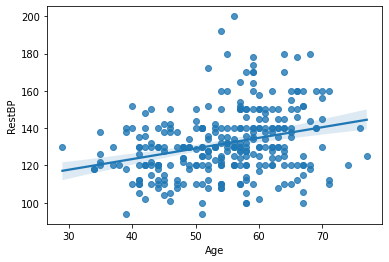

In [89]:
sns.regplot(data=heart, x="Age", y="RestBP")

#### Resting blood pressure and Sex

In [90]:
results = smf.ols('RestBP ~ Sex', data=heart).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 RestBP   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.304
Date:                Thu, 16 Sep 2021   Prob (F-statistic):              0.254
Time:                        14:10:28   Log-Likelihood:                -1274.8
No. Observations:                 297   AIC:                             2554.
Df Residuals:                     295   BIC:                             2561.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    133.3958      1.812     73.619      0.0

<AxesSubplot:xlabel='Sex', ylabel='RestBP'>

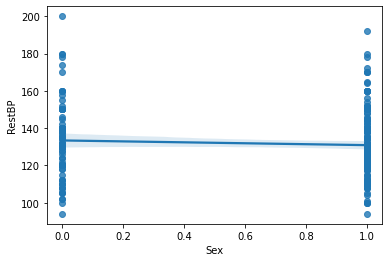

In [91]:
sns.regplot(data=heart, x="Sex", y="RestBP")

#### Resting blood pressure and Cholesterol level

In [92]:
results = smf.ols('RestBP ~ Chol', data=heart).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 RestBP   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     5.194
Date:                Thu, 16 Sep 2021   Prob (F-statistic):             0.0234
Time:                        14:10:29   Log-Likelihood:                -1272.8
No. Observations:                 297   AIC:                             2550.
Df Residuals:                     295   BIC:                             2557.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    120.5792      4.983     24.198      0.0

#### Resting blood pressure and Chest pain

#### Resting blood pressure and Fasting blood sugar

In [93]:
results = smf.ols('RestBP ~ Fbs', data=heart).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 RestBP   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     9.976
Date:                Thu, 16 Sep 2021   Prob (F-statistic):            0.00175
Time:                        14:10:29   Log-Likelihood:                -1270.5
No. Observations:                 297   AIC:                             2545.
Df Residuals:                     295   BIC:                             2552.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    130.3740      1.098    118.736      0.0

<AxesSubplot:xlabel='Fbs', ylabel='RestBP'>

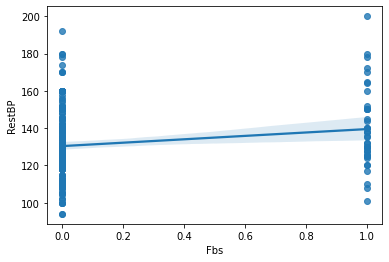

In [94]:
sns.regplot(data=heart, x="Fbs", y="RestBP")

#### Resting blood pressure and Resting ECG results

#### Resting blood pressure and Maximum heart rate

In [95]:
results = smf.ols('RestBP ~ MaxHR', data=heart).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 RestBP   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.7131
Date:                Thu, 16 Sep 2021   Prob (F-statistic):              0.399
Time:                        14:10:29   Log-Likelihood:                -1275.1
No. Observations:                 297   AIC:                             2554.
Df Residuals:                     295   BIC:                             2562.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    137.3817      6.814     20.161      0.0

<AxesSubplot:xlabel='MaxHR', ylabel='RestBP'>

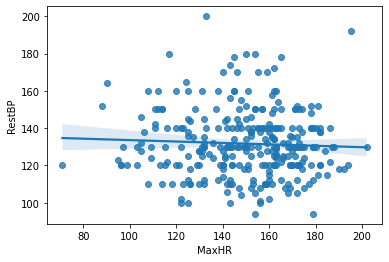

In [96]:
sns.regplot(data=heart, x="MaxHR", y="RestBP")

#### Resting blood pressure and Exercise induced angina

In [97]:
results = smf.ols('RestBP ~ ExAng', data=heart).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 RestBP   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.318
Date:                Thu, 16 Sep 2021   Prob (F-statistic):              0.252
Time:                        14:10:29   Log-Likelihood:                -1274.8
No. Observations:                 297   AIC:                             2554.
Df Residuals:                     295   BIC:                             2561.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    130.8700      1.255    104.250      0.0

<AxesSubplot:xlabel='ExAng', ylabel='RestBP'>

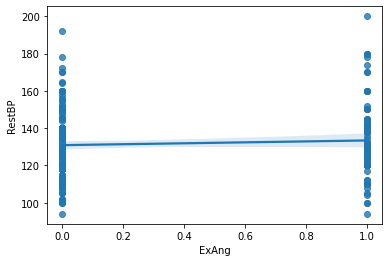

In [98]:
sns.regplot(data=heart, x="ExAng", y="RestBP")

#### Resting blood pressure and Exercise dependent ST depression

In [99]:
results = smf.ols('RestBP ~ Oldpeak', data=heart).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 RestBP   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     11.20
Date:                Thu, 16 Sep 2021   Prob (F-statistic):           0.000924
Time:                        14:10:29   Log-Likelihood:                -1269.9
No. Observations:                 297   AIC:                             2544.
Df Residuals:                     295   BIC:                             2551.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    128.6187      1.368     94.024      0.0

<AxesSubplot:xlabel='Oldpeak', ylabel='RestBP'>

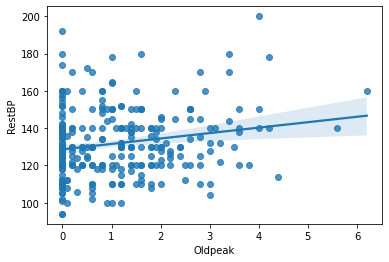

In [100]:
sns.regplot(data=heart, x="Oldpeak", y="RestBP")

#### Resting blood pressure and ST Wave slope at maximal effort

#### Resting blood pressure and The number of coronary blood vessels detected via fluorscopy

In [101]:
results = smf.ols('RestBP ~ Ca', data=heart).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 RestBP   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     2.858
Date:                Thu, 16 Sep 2021   Prob (F-statistic):             0.0920
Time:                        14:10:30   Log-Likelihood:                -1274.0
No. Observations:                 297   AIC:                             2552.
Df Residuals:                     295   BIC:                             2559.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    130.4395      1.267    102.928      0.0

<AxesSubplot:xlabel='Ca', ylabel='RestBP'>

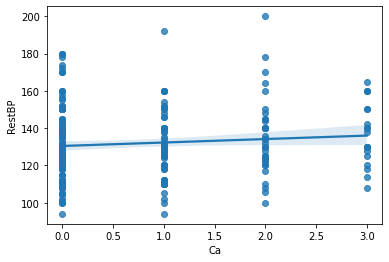

In [102]:
sns.regplot(data=heart, x="Ca", y="RestBP")

#### Resting blood pressure and The thallium stress test response

#### Resting blood pressure and The patient's diagnostic status for Angiographic heart disease

In [103]:
results = smf.ols('RestBP ~ AHD', data=heart).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 RestBP   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     7.118
Date:                Thu, 16 Sep 2021   Prob (F-statistic):            0.00805
Time:                        14:10:30   Log-Likelihood:                -1271.9
No. Observations:                 297   AIC:                             2548.
Df Residuals:                     295   BIC:                             2555.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    129.1750      1.390     92.933      0.0

<AxesSubplot:xlabel='AHD', ylabel='RestBP'>

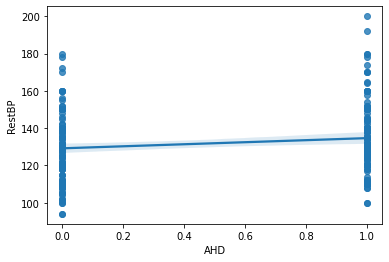

In [104]:
sns.regplot(data=heart, x="AHD", y="RestBP")

### Multiple regression to predict resting blood pressure using all variables
Identify which predictors are statistically significant

In [115]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
reg=linear_model.LinearRegression()
sfs=SequentialFeatureSelector(
    reg, n_features_to_select=3,
    
)

# Get predictors and response
X=heart.drop(['PatientID', 'RestBP'], axis=1).to_numpy()
y=heart['RestBP'].to_numpy()

# Run sequential feature selector
sfs.fit(X,y)
sfs.get_support()


array([ True, False, False, False,  True, False, False, False,  True,
       False, False, False, False])

array([145, 160, 120, 130, 130, 120, 140, 120, 130, 140, 140, 140, 130,
       120, 172, 150, 110, 140, 130, 130, 110, 150, 120, 132, 130, 120,
       120, 150, 150, 110, 140, 117, 140, 135, 130, 140, 120, 150, 132,
       150, 150, 140, 160, 150, 130, 112, 110, 150, 140, 130, 105, 120,
       112, 130, 130, 124, 140, 110, 125, 125, 130, 142, 128, 135, 120,
       145, 140, 150, 170, 150, 155, 125, 120, 110, 110, 160, 125, 140,
       130, 150, 104, 130, 140, 180, 120, 140, 138, 138, 130, 120, 160,
       130, 108, 135, 128, 110, 150, 134, 122, 115, 118, 128, 110, 120,
       108, 140, 128, 120, 118, 145, 125, 118, 132, 130, 135, 140, 138,
       130, 135, 130, 150, 100, 140, 138, 130, 200, 110, 120, 124, 120,
        94, 130, 140, 122, 135, 145, 120, 120, 125, 140, 170, 128, 125,
       105, 108, 165, 112, 128, 102, 152, 102, 115, 160, 120, 130, 140,
       125, 140, 118, 101, 125, 110, 100, 124, 132, 132, 126, 112, 160,
       142, 174, 140, 145, 152, 108, 132, 130, 130, 124, 134, 14

### Forwards and Backwards selection of resting blood pressure predictors
  + choose an optimal combination of covariates to predict a patient's resting blood pressure
  + justify the choice of parameters
  + I'm planning to use adjusted R squared because it accounts for both fit and parsimony

# Angiographic Heart Disease Prediction

### Single variable logistic regression
estimate the probability of a patient having angiographic heart disease for each variable separately. 
+ Report Odds ratio's and 95% CI
+ Identify variables that are significantly associated with AHD

### Fit a multiple logistic regression using all predictors
+ Identify significant predictors
+ Report the C-Index and AUC, plot ROC curve
+ Report and describe sensetivity and specificicity of the optimally thresholded model

# Angiographic Heart Disease Train/Test Split

### Split the data into appropriate partition's using sklearn

### Assess the similarity of the partitions in each of the predictors and the outcome